Image dimensions are 815 x 615
Map corner: x: 609, y: 584
Map corner: x: 219, y: 579
Map corner: x: 251, y: 57
Map corner: x: 586, y: 53
Image center is (416.25, 318.25)
Top left (251, 57)
Top Right (586, 53)
Bottom left (219, 579)
Bottom right (609, 584)
Rectified image dimensions are 381 x 600


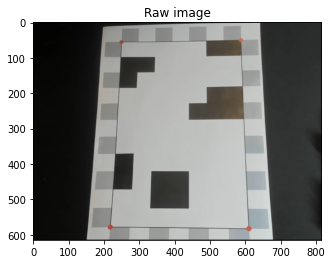

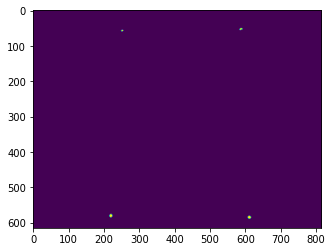

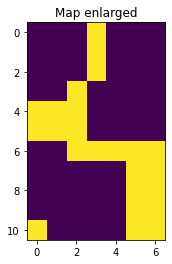

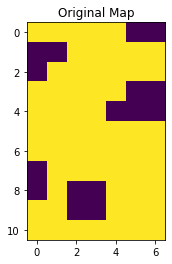

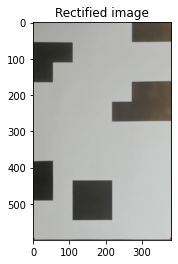

Image dimensions are 815 x 615
Map corner: x: 609, y: 584
Map corner: x: 219, y: 579
Map corner: x: 251, y: 57
Map corner: x: 586, y: 53
Image center is (416.25, 318.25)
Top left (251, 57)
Top Right (586, 53)
Bottom left (219, 579)
Bottom right (609, 584)
Rectified image dimensions are 381 x 600


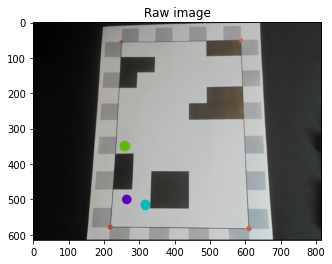

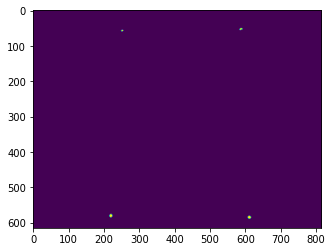

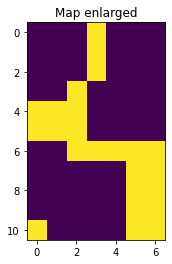

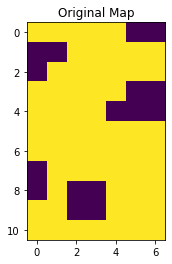

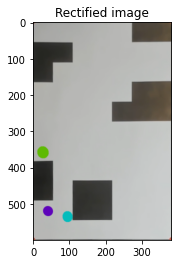

Thymio_pose [1.         9.         3.41739855]
Goal_coords (0, 6)


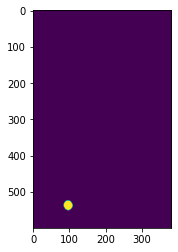

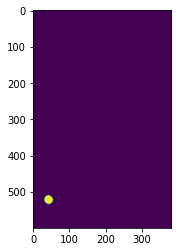

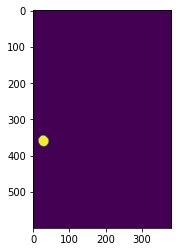

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

import sys  
#sys.path

sys.path.append(r"C:\Users\nelso\AppData\Local\GitHubDesktop\app-2.8.1\BMR-Final-Project\src")
import create_map
import locate_thymio_goal
import img_utils

from create_map import *
from locate_thymio_goal import *
from img_utils import *



filename = 'img/test_points3.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

################################################IMG_CORRECTION////////////////////////////////////////////////////

# read image
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Raw image")

# Initialize map
M, rect_width, rect_height, map, map_enlarged, success = create_map(img, 7, 11, verbose = True)
if success:
    plt.figure()
    plt.imshow(map_enlarged, origin = 'lower')
    plt.title("Map enlarged")
    plt.gca().invert_yaxis()
    plt.figure()
    plt.imshow(map, origin = 'lower')
    plt.title("Original Map")
    plt.gca().invert_yaxis()
    # We can now get the rectified image using the warp transform matrix
    # Separating the processes allow us to recalculate quickly the rectified map
    # without having to recalculate the warp transform matrix (assuming fixed camera).
    img_rect = get_rectified_img(img, M, rect_width, rect_height)
    plt.figure()
    plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
    plt.title("Rectified image")
    plt.show()
else:
    print("Map was not successfully computed.")

[thymio_pose,thymio_found] = locate_thymio_camera(img_rect,'grid', [7,11])
[goal_coords,goal_found] = locate_goal_camera(img_rect,'grid', [7,11])


#hsv = cv2.cvtColor(img_rect, cv2.COLOR_BGR2HSV)
#hsv[270, 70]
#img[270,300]
print("Thymio_pose {}".format(thymio_pose))
print("Goal_coords {}".format(goal_coords))
if(thymio_found == 0):
    print("Thymio not found!")
if(goal_found == 0) :
    print("Goal not found!")
